# CodSoft Task 3 Churn Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
data=pd.read_csv(r'C:\Users\ok\Desktop\New folder\Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
#removing the unnecessary data
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [5]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
geo=data['Geography'].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

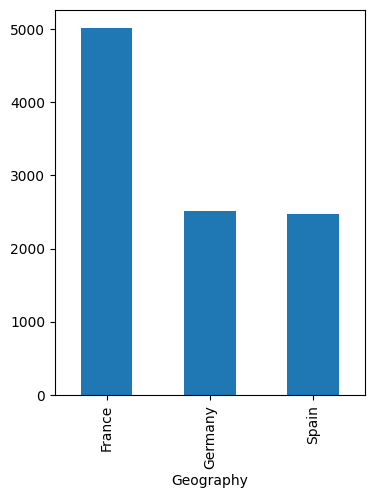

In [9]:
plt.figure(figsize=(4,5))
geo.plot(kind='bar')
plt.show

In [10]:
#one hot encoding gender and geography column to convert it to 1 and 0s etc
data=pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

In [11]:
# now splitting the target and features from the data
x=data.drop(columns=['Exited'])
y=data['Exited']

### Splitting the data into train and test data using sklearn

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25, random_state=3)

In [13]:
from sklearn.preprocessing import StandardScaler
feaut=StandardScaler()
x_train=feaut.fit_transform(x_train)
x_test=feaut.transform(x_test)

## Building ANN Model

In [14]:
model=Sequential([
    Dense(64, activation='relu', input_dim=11),
    Dense(1, activation='sigmoid')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, validation_split=0.2, epochs=80, verbose=1)

Epoch 1/80
188/188 [==============================] - 3s 9ms/step - loss: 0.4897 - accuracy: 0.7842 - val_loss: 0.4229 - val_accuracy: 0.8273
Epoch 2/80
188/188 [==============================] - 1s 7ms/step - loss: 0.4158 - accuracy: 0.8247 - val_loss: 0.4061 - val_accuracy: 0.8300
Epoch 3/80
188/188 [==============================] - 1s 8ms/step - loss: 0.3971 - accuracy: 0.8350 - val_loss: 0.3928 - val_accuracy: 0.8333
Epoch 4/80
188/188 [==============================] - 1s 7ms/step - loss: 0.3810 - accuracy: 0.8437 - val_loss: 0.3791 - val_accuracy: 0.8453
Epoch 5/80
188/188 [==============================] - 1s 7ms/step - loss: 0.3675 - accuracy: 0.8495 - val_loss: 0.3701 - val_accuracy: 0.8467
Epoch 6/80
188/188 [==============================] - 1s 7ms/step - loss: 0.3572 - accuracy: 0.8527 - val_loss: 0.3637 - val_accuracy: 0.8507
Epoch 7/80
188/188 [==============================] - 1s 7ms/step - loss: 0.3505 - accuracy: 0.8592 - val_loss: 0.3621 - val_accuracy: 0.8487
Epoch 

188/188 [==============================] - 1s 6ms/step - loss: 0.3111 - accuracy: 0.8728 - val_loss: 0.3611 - val_accuracy: 0.8433
Epoch 59/80
188/188 [==============================] - 1s 7ms/step - loss: 0.3109 - accuracy: 0.8718 - val_loss: 0.3569 - val_accuracy: 0.8573
Epoch 60/80
188/188 [==============================] - 1s 6ms/step - loss: 0.3100 - accuracy: 0.8713 - val_loss: 0.3566 - val_accuracy: 0.8547
Epoch 61/80
188/188 [==============================] - 1s 6ms/step - loss: 0.3104 - accuracy: 0.8712 - val_loss: 0.3570 - val_accuracy: 0.8587
Epoch 62/80
188/188 [==============================] - 1s 6ms/step - loss: 0.3096 - accuracy: 0.8733 - val_loss: 0.3572 - val_accuracy: 0.8567
Epoch 63/80
188/188 [==============================] - 1s 7ms/step - loss: 0.3096 - accuracy: 0.8718 - val_loss: 0.3587 - val_accuracy: 0.8520
Epoch 64/80
188/188 [==============================] - 1s 7ms/step - loss: 0.3102 - accuracy: 0.8730 - val_loss: 0.3588 - val_accuracy: 0.8500
Epoch 65/80

In [18]:
y_pred=model.predict(x_test)

79/79 [==============================] - 1s 4ms/step


In [19]:
y_pred=(y_pred>0.5)


In [20]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test, y_pred)
conf_mat

array([[1901,   81],
       [ 270,  248]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8596